### **First Step:**
- 🎧 The Spotify dataset will be loaded from the staging table into a Pandas DataFrame for further processing.
- 🛠️ The column display limit will be removed to ensure that all columns are visible when inspecting the DataFrame.
- 📊 An SQL query from the select_all_rows.sql file will be executed to retrieve data from the spotify_staging table, and this data will be converted into a Pandas DataFrame.
- 👀 The first 5 rows of the dataset will be previewed to get an initial understanding of its structure and content.

In [2]:
#Import Libraries
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Add the 'src' folder to sys.path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

#import previously created classes

from connections.db import PostgreSQLConnection
from utils.data_analysis_functions import DataAnalyzer

db_service = PostgreSQLConnection()

In [3]:
# Set display options for DataFrame columns
pd.set_option('display.max_columns', None)  # Set to None to display all columns without limitation
pd.set_option('display.max_colwidth', None)  # Do not limit the width of column content
pd.set_option('display.expand_frame_repr', False)  # Prevent pandas from breaking the DataFrame into multiple lines

In [4]:
# Create a DataFrame from the Spotify staging table
# This line runs an SQL query from a file ('select_all_rows.sql') located in the '../sql/queries/' directory,
# and retrieves all rows from the 'spotify_staging' table, storing the result in the 'spotify_data' DataFrame.
spotify_data = db_service.create_dataframe('../sql/queries/select_all_rows.sql', 'spotify_staging')

# Display the first 5 rows of the 'spotify_data' DataFrame to preview the data.
spotify_data.head(5)


✓ DataFrame created successfully.


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit_column,danceability,energy,key_column,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Soundtrack),Can t Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
# Print the shape of the 'spotify_data' DataFrame, which returns a tuple with the number of rows and columns.
print(spotify_data.shape)

(114000, 21)


## **Second Step:**
- 📊 The dataset will be analyzed to understand its general structure and dimensions.
- 🔢 The number of rows and columns in the dataset will be checked.
- 🧮 Relevant numerical columns will be selected and analyzed to evaluate their statistical behavior.
- 📊 The DataAnalyzer class will be imported and used to generate descriptive statistics for the selected numerical columns.
- 📉 Histograms will be generated to visualize the distribution of numerical variables.
- 🗂️ Categorical columns will be identified and analyzed to understand their composition.
- 📊 Metrics such as frequencies or unique value counts will be generated for the categorical columns.
- 🔍 Records containing at least one missing value will be filtered to identify potential issues in the data.


In [6]:
# First, we select and analyze numerical columns from the 'spotify_data' DataFrame.
# The 'selected_columns' list contains the names of the numerical columns we are interested in.
selected_columns = ['energy', 'danceability', 'duration_ms', 'popularity', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Extract the numerical columns specified in 'selected_columns' from the 'spotify_data' DataFrame and store them in 'numerical_cols'.
numerical_cols = spotify_data[selected_columns]

# Display the shape (number of rows and columns) of the 'numerical_cols' DataFrame.
numerical_cols.shape


(114000, 11)

In [7]:
# We import the DataAnalyzer class to analyze the numerical data.
# An instance of the DataAnalyzer class is created, passing the 'spotify_data' DataFrame to it.
analyzer_statistic = DataAnalyzer(spotify_data)


In [8]:
# Analyze the numerical columns using the 'analyze_and_combine' method from the DataAnalyzer class.
# The analysis is performed on the columns specified in 'selected_columns'.
# The result is stored in 'statistics_numeric', which will likely contain combined statistical information for the selected numerical columns.
statistics_numeric = analyzer_statistic.analyze_and_combine(selected_columns)

# Display the combined statistics for the selected numerical columns.
statistics_numeric


,Column Name,Data Type,Unique Values,Repeated Values,Missing Values,Number of Duplicates,count,mean,std,min,25%,50%,75%,max,Mode,Variance,Skewness,Kurtosis
0,acousticness,float64,3677,110323,0,110323,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996,1.00,1.100000e-01,0.73,-0.95
1,danceability,float64,1174,112826,0,112826,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985,0.65,3.000000e-02,-0.40,-0.18
2,duration_ms,int64,50697,63303,0,63303,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000,162897.00,1.151280e+10,11.20,354.95
3,energy,float64,2080,111920,0,111920,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000,0.88,6.000000e-02,-0.60,-0.53
4,instrumentalness,float64,3655,110345,0,110345,114000.0,0.156050,0.309555,0.000,0.00000,0.000042,0.0490,1.000,0.00,1.000000e-01,1.73,1.27
5,liveness,float64,1722,112278,0,112278,114000.0,0.213553,0.190378,0.000,0.09800,0.132000,0.2730,1.000,0.11,4.000000e-02,2.11,4.38
6,loudness,float64,19480,94520,0,94520,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532,-5.66,2.529000e+01,-2.01,5.90
7,popularity,int64,101,113899,0,113899,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000,0.00,4.975200e+02,0.05,-0.93
8,speechiness,float64,1489,112511,0,112511,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965,0.03,1.000000e-02,4.65,28.82
9,tempo,float64,45653,68347,0,68347,114000.0,122.147837,29.978197,0.000,99.21875,122.017000,140.0710,243.372,0.00,8.986900e+02,0.23,-0.11


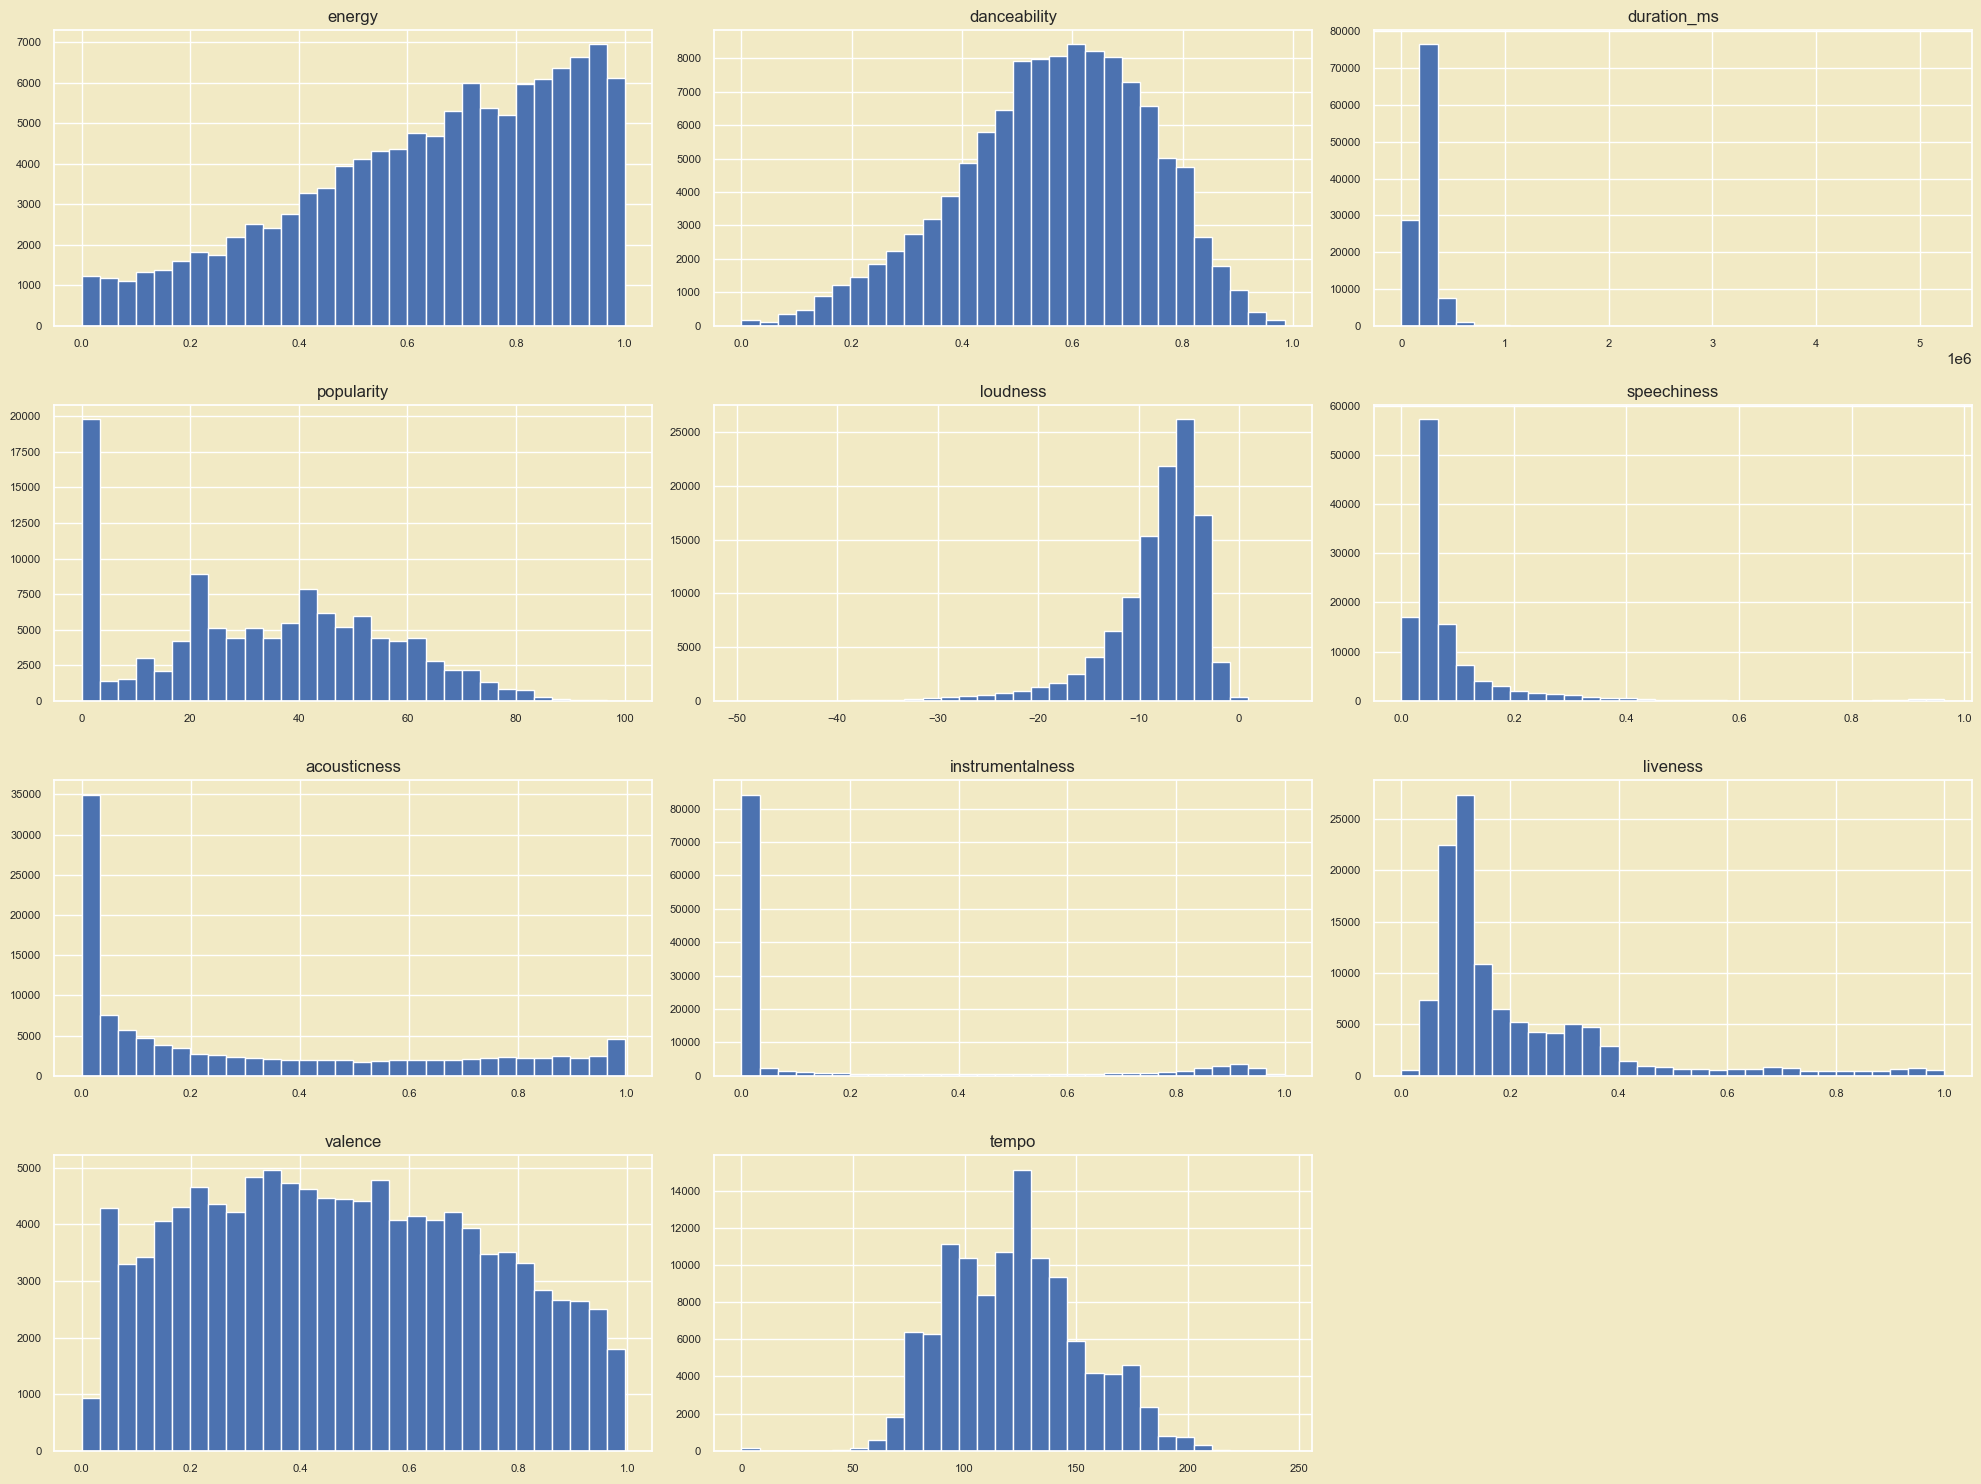

In [55]:
# Set the style for Seaborn visualizations to 'darkgrid'.
sns.set_style('darkgrid')

# Customize the background color of the plots.
# Set the axes background to a light beige color ("#F2EAC5") and the figure background to the same color.
sns.set(rc={"axes.facecolor":"#F2EAC5", "figure.facecolor":"#F2EAC5"})

# Create histograms for each numerical column in 'numerical_cols'.
# The figure size is set to 20x15 inches, with 30 bins for the histograms.
# The label size for both x and y axes is set to 8.
numerical_cols.hist(figsize=(20,15), bins=30, xlabelsize=8, ylabelsize=8)

# Adjust the layout to prevent overlap between subplots.
plt.tight_layout()

# Display the histograms.
plt.show()


In [10]:
# Now we analyze the categorical columns.
# We define 'categorical_columns_name', a list of the categorical column names we are interested in.
categorical_columns_name = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'explicit_column', 'track_genre', 'time_signature', 'key_column', 'mode']

# Extract the specified categorical columns from the 'spotify_data' DataFrame and store them in 'categorical_cols'.
categorical_cols = spotify_data[categorical_columns_name]

# Display the shape (number of rows and columns) of the 'categorical_cols' DataFrame.
categorical_cols.shape


(114000, 10)

In [11]:
# Analyze the categorical columns using the 'analize_categorical_data' method from the DataAnalyzer class.
# The analysis is performed on the columns specified in 'categorical_columns_name'.
# The result is stored in 'analyser_categorical', which will likely contain insights such as counts and unique values for each categorical column.
analyser_categorical = analyzer_statistic.analize_categorical_data(categorical_columns_name)

# Display the results of the categorical data analysis.
analyser_categorical


,Column Name,Data Type,Unique Values,Repeated Values,Missing Values,Number of Duplicates,count,unique,top,freq
0,Unnamed: 0,int64,114000,0,0,0,114000,114000,113983,1
1,album_name,object,46589,67411,1,67410,113999,46589,Alternative Christmas 2022,195
2,artists,object,31437,82563,1,82562,113999,31437,The Beatles,279
3,explicit_column,bool,2,113998,0,113998,114000,2,False,104253
4,key_column,int64,12,113988,0,113988,114000,12,7,13245
5,mode,int64,2,113998,0,113998,114000,2,1,72681
6,time_signature,int64,5,113995,0,113995,114000,5,4,101843
7,track_genre,object,114,113886,0,113886,114000,114,acoustic,1000
8,track_id,object,89741,24259,0,24259,114000,89741,6S3JlDAGk3uu3NtZbPnuhS,9
9,track_name,object,73608,40392,1,40391,113999,73608,Run Rudolph Run,151


In [12]:
# Filter the records in the 'spotify_data' DataFrame that contain at least one null (missing) value.
# The 'isnull().any(axis=1)' method checks each row for any null values, and the resulting boolean mask is used to filter the DataFrame.
spotify_data[spotify_data.isnull().any(axis=1)]



,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit_column,danceability,energy,key_column,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65939,65900,1kR4gIb7nGxHPI3D2ifs59,None,None,None,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


### **Third Step:**
🔎 Analyze specific columns for detailed insights:

- **Unnamed: 0 (🔢):**
    - 🔢 Verify if all values are integers and check if the values are auto-incremental.
    - ✅ Confirm if all values are unique.

In [13]:
# Sort the values in the 'Unnamed: 0' column of the 'spotify_data' DataFrame and store the sorted result in 'unnamed_0'.
unnamed_0 = spotify_data['Unnamed: 0'].sort_values()


In [14]:
# Display the first 5 rows of the sorted 'unnamed_0' Series to preview the sorted values.
unnamed_0.head(5)


0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: object

In [15]:
# Check if all values in the 'unnamed_0' Series are of integer type.
are_integers = unnamed_0.dtype == 'int64'

# Print a message indicating whether the 'Unnamed: 0' column contains only integers.
print(f"Is 'Unnamed: 0' contain only integers?: {are_integers}")


Is 'Unnamed: 0' contain only integers?: False


In [16]:
# Check if the 'unnamed_0' Series is auto-incremental by calculating the difference between consecutive values,
# dropping any NaN values, and checking if all differences equal 1.
is_auto_incremental = (unnamed_0.diff().dropna() == 1).all()

# Print a message indicating whether the 'Unnamed: 0' column is auto-incremental.
print(f"Is 'Unnamed: 0' auto incremental?: {is_auto_incremental}")


Is 'Unnamed: 0' auto incremental?: True


In [56]:
# Check if all records in the 'unnamed_0' Series are unique by comparing the number of unique values
# to the total length of the Series.
all_unique = unnamed_0.nunique() == len(unnamed_0)

# Print a message indicating whether all records in 'Unnamed: 0' are unique.
print(f"Are all records in 'unnamed_0' unique?: {all_unique}")


Are all records in 'unnamed_0' unique?: True


- **Track ID (🎫):**
    - 🚨 Identify and handle duplicate records.
    - 🔍 Investigate specific records with a random track_id to understand any inconsistencies.

In [18]:
# Extract the 'track_id' column from the 'spotify_data' DataFrame and store it in the 'track_id' variable.
track_id = spotify_data['track_id']


In [19]:
# Display the first 5 rows of the 'track_id' Series to preview the track IDs.
track_id.head(5)


0    5SuOikwiRyPMVoIQDJUgSV
1    4qPNDBW1i3p13qLCt0Ki3A
2    1iJBSr7s7jYXzM8EGcbK5b
3    6lfxq3CG4xtTiEg7opyCyx
4    5vjLSffimiIP26QG5WcN2K
Name: track_id, dtype: object

In [20]:
# When reviewing the unique values of 'track_id', it can be observed that there are duplicate records.
# To investigate further, we will fetch all records with a specific 'track_id' to see the details.

# Filter the 'spotify_data' DataFrame to obtain records where the 'track_id' is equal to '6S3JlDAGk3uu3NtZbPnuhS'.
filtered_records = spotify_data[spotify_data['track_id'] == '6S3JlDAGk3uu3NtZbPnuhS']

# Print the first 5 filtered records to examine the duplicates and their details.
filtered_records.head(5)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit_column,danceability,energy,key_column,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8324,8315,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,blues
19788,19759,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,country
34756,34728,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,folk
62270,62226,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,j-pop
63129,63087,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,j-rock


- **Artists (🎤):**
    - 🎤 Count unique artists and display their frequencies.

In [21]:
# Extract the 'artists' column from the 'spotify_data' DataFrame and store it in the 'artist' variable.
artist = spotify_data['artists']


In [22]:
# Display the first 5 rows of the 'artist' Series to preview the names of the artists.
artist.head(5)


0               Gen Hoshino
1              Ben Woodward
2    Ingrid Michaelson ZAYN
3              Kina Grannis
4          Chord Overstreet
Name: artists, dtype: object

In [23]:
# Count the unique records in the 'artists' Series and print the counts for each artist.
# This will show the number of occurrences for each unique artist in the dataset.
print(f"The count of unique artists in the dataset and their respective quantities are as follows:\n{artist.value_counts()}")


The count of unique artists in the dataset and their respective quantities are as follows:
artists
The Beatles                                 279
George Jones                                271
Stevie Wonder                               236
Linkin Park                                 224
Ella Fitzgerald                             222
                                           ... 
Hillsong Worship TAYA David Ware              1
Bethel Music Jenn Johnson Chris Quilala       1
Chris Tomlin Bear Rinehart NEEDTOBREATHE      1
Eddie Vedder Nusrat Fateh Ali Khan            1
Bethel Music Sydney Allen                     1
Name: count, Length: 31437, dtype: int64


- **Album Name (💿):**
    - 💿 Count unique albums and their frequencies.
    - 🎶 Check if albums contain multiple unique artists and identify such cases, specifically for albums like "Hold On".
    - 🔒 Ensure that track_id values are unique for each combination of album and artist.

In [24]:
# Extract the 'album_name' column from the 'spotify_data' DataFrame and store it in the 'album_name' variable.
album_name = spotify_data['album_name']


In [25]:
# Display the first 5 rows of the 'album_name' Series to preview the names of the albums.
album_name.head(5)


0                                                    Comedy
1                                          Ghost (Acoustic)
2                                            To Begin Again
3    Crazy Rich Asians (Original Motion Picture Soundtrack)
4                                                   Hold On
Name: album_name, dtype: object

In [26]:
# Count the unique records in the 'album_name' Series and print the counts for each album.
# This will show the number of occurrences for each unique album in the dataset.
print(f"The count of unique albums in the dataset and their respective quantities are as follows:\n{album_name.value_counts()}")


The count of unique albums in the dataset and their respective quantities are as follows:
album_name
Alternative Christmas 2022     195
Feliz Cumpleaños con Perreo    184
Metal                          143
Halloween con perreito         123
Halloween Party 2022           115
                              ... 
A Greater Song (Live)            1
This is Thetahealing             1
Phenomena (DA DA) Remixes        1
What A Beautiful Name - EP       1
The Boy Who Never                1
Name: count, Length: 46589, dtype: int64


In [27]:
# Verify if the 'album_name' column contains albums with different artist names.

# Group the data by 'album_name' and count the number of unique artists for each album.
albums_with_multiple_artists = spotify_data.groupby('album_name')['artists'].nunique()

# Filter to find those albums that have more than one artist.
albums_with_different_artists = albums_with_multiple_artists[albums_with_multiple_artists > 1].index

# Get specific records of albums that have different artists.
different_artists_per_album = spotify_data[spotify_data['album_name'].isin(albums_with_different_artists)]

# Filter to find records for a specific album of interest, in this case, "Hold On".
specific_album = different_artists_per_album[different_artists_per_album['album_name'] == 'Hold On']

# Show the records of the album "Hold On" with different artists.
specific_album



,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit_column,danceability,energy,key_column,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,2,-9.681,1,0.0526,0.469000,0.000000,0.0829,0.1670,119.949,4,acoustic
957,954,7qHPp1beQupJUzwRyVtoyy,Chord Overstreet,Hold On,Hold On,35,198853,False,0.609,0.443,2,-9.681,1,0.0546,0.469000,0.000000,0.0829,0.1660,119.967,4,acoustic
13826,13802,5KKyQmvhDblL9h24iMMDzC,Romanthony,Hold On,Hold On - Classic Vocal,5,385753,False,0.667,0.865,4,-5.116,1,0.3960,0.005690,0.000002,0.1010,0.4890,119.790,4,chicago-house
23705,23658,7hOXCmwRv1oDNWfxQrwZoy,Ali Bakgor biskuwi widerberg,Hold On,Hold On,41,183445,False,0.592,0.859,2,-8.768,0,0.0326,0.000158,0.914000,0.1120,0.0798,123.009,4,deep-house
46861,46805,5CCyKw0w72mueGAfyQecGK,Jakka-B,Hold On,Hold On,16,219636,False,0.396,0.632,3,-3.213,0,0.0369,0.079800,0.000000,0.0710,0.2270,164.784,4,happy
110818,110817,4ppG3XawSqo2b0qpq4E3vb,Armin van Buuren Davina Michelle,Hold On,Hold On,55,207727,False,0.603,0.738,7,-5.464,0,0.0646,0.037000,0.000002,0.1600,0.3270,132.047,4,trance


In [28]:
# Verify if all 'track_id' values are unique for each unique combination of 'album_name' and 'artists'.

# Create a DataFrame with unique combinations of 'album_name', 'artists', and 'track_id' by dropping duplicates.
unique_combinations = spotify_data[['album_name', 'artists', 'track_id']].drop_duplicates()

# Check if all 'track_id' values are unique within these unique combinations.
are_all_track_ids_unique = unique_combinations['track_id'].nunique() == unique_combinations.shape[0]

# Print the result indicating whether all records in 'track_id' are unique for each unique combination of album and artist.
print(f"Are all records in 'track_id' unique for each unique combination of album and artist?: {are_all_track_ids_unique}")



Are all records in 'track_id' unique for each unique combination of album and artist?: True


- Track Name (🎵):
    - 🎵 Count unique track names and display their frequencies.

In [29]:
# Extract the 'track_name' column from the 'spotify_data' DataFrame and store it in the 'track_name' variable.
track_name = spotify_data['track_name']


In [30]:
# Display the first 5 rows of the 'track_name' Series to preview the names of the tracks.
track_name.head(5)


0                        Comedy
1              Ghost - Acoustic
2                To Begin Again
3    Can t Help Falling In Love
4                       Hold On
Name: track_name, dtype: object

In [60]:
# Count the unique records in the 'track_name' Series and print the counts for each unique track name.
# This will show the number of occurrences for each unique track name in the dataset.
print(f"The count of unique track names in the dataset and their respective quantities are as follows:\n{track_name.value_counts()}")


The count of unique track names in the dataset and their respective quantities are as follows:
track_name
Run Rudolph Run                   151
Halloween                          88
Frosty The Snowman                 81
Little Saint Nick - 1991 Remix     76
Last Last                          75
                                 ... 
Encased in Ice                      1
Eu Quero É Que Se Foda              1
Hallelujah On My Knees - Live       1
Stay (You Are Good) - Live          1
Sueños Vividos                      1
Name: count, Length: 73608, dtype: int64


- **Explicit Column (🚫):**
    - 🚫 Count occurrences of explicit and non-explicit songs.
    - 🥧 Visualize the distribution of explicit and non-explicit songs using a pie chart.

In [32]:
# Extract the 'explicit_column' from the 'spotify_data' DataFrame and store it in the 'explicit_column' variable.
explicit_column = spotify_data['explicit_column']


In [57]:
# Display the first 5 rows of the 'explicit_column' Series to preview whether the tracks are marked as explicit or not.
explicit_column.head(5)


0    False
1    False
2    False
3    False
4    False
Name: explicit_column, dtype: object

In [58]:
# Count the unique records in the 'explicit_column' Series and print the counts for each unique value.
# This will show the number of occurrences for explicit and non-explicit tracks in the dataset.
print(f"The count of explicit_column names in the dataset and their respective quantities are as follows:\n{explicit_column.value_counts()}")


The count of explicit_column names in the dataset and their respective quantities are as follows:
explicit_column
False    104253
True       9747
Name: count, dtype: int64


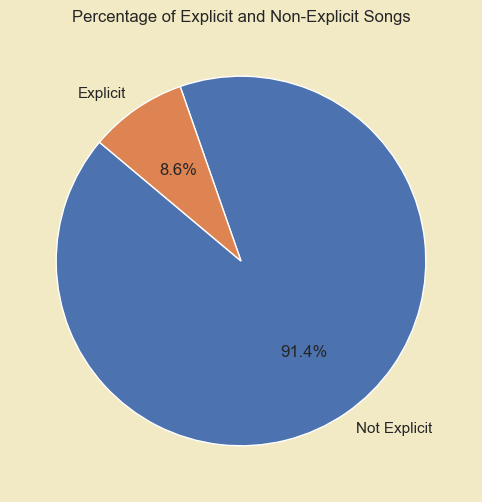

In [59]:
# Create a pie chart to visualize the distribution of explicit and non-explicit songs in the 'explicit_column'.

# Set the figure size for the pie chart.
plt.figure(figsize=(10, 6))

# Create the pie chart using the counts of values in the 'explicit_column'.
# Labels are set to 'Not Explicit' and 'Explicit', and 'autopct' displays the percentage of each category.
# The 'startangle' parameter rotates the chart for better visual appeal.
plt.pie(explicit_column.value_counts(), labels=['Not Explicit', 'Explicit'], autopct='%1.1f%%', startangle=140)

# Set the title for the pie chart.
plt.title('Percentage of Explicit and Non-Explicit Songs')

# Display the pie chart.
plt.show()


- **Key Column (🎹):**
    - 🎹 Count unique keys and display their frequencies.
    - 🥧 Visualize the distribution of key values with a pie chart.

In [36]:
# Extract the 'key_column' from the 'spotify_data' DataFrame and store it in the 'key_column' variable.
key_column = spotify_data['key_column']


In [37]:
# Display the first 5 rows of the 'key_column' Series to preview the musical keys associated with the tracks.
key_column.head(5)


0    1
1    1
2    0
3    0
4    2
Name: key_column, dtype: object

In [61]:
# Count the unique records in the 'key_column' Series and print the counts for each unique key.
# This will show the number of occurrences for each musical key in the dataset.
print(f"The count of unique track names in the dataset and their respective quantities are as follows:\n{key_column.value_counts()}")


The count of unique track names in the dataset and their respective quantities are as follows:
key_column
7     13245
0     13061
2     11644
9     11313
1     10772
5      9368
11     9282
4      9008
6      7921
10     7456
8      7360
3      3570
Name: count, dtype: int64


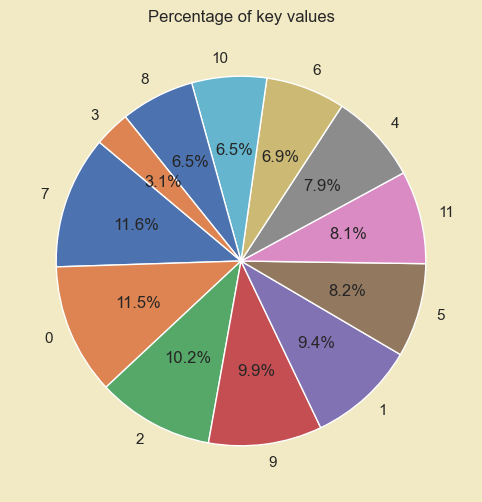

In [62]:
# Create a pie chart to visualize the distribution of musical keys in the 'key_column'.

# Set the figure size for the pie chart.
plt.figure(figsize=(10, 6))

# Create the pie chart using the counts of values in the 'key_column'.
# The labels are set to the unique keys from the 'key_column', and 'autopct' displays the percentage of each category.
# The 'startangle' parameter rotates the chart for better visual appeal.
plt.pie(key_column.value_counts(), labels=key_column.value_counts().index, autopct='%1.1f%%', startangle=140)

# Set the title for the pie chart.
plt.title('Percentage of key values')

# Display the pie chart.
plt.show()


- **time_signature**

In [40]:
time_signature = spotify_data['time_signature']

In [41]:
time_signature.head(5)

0    4
1    4
2    4
3    3
4    4
Name: time_signature, dtype: object

In [42]:
# Count of unique records in 'time_signature' and this quantity
print(f"The count of unique time_signature values in the dataset and their respective quantities are as follows:\n{time_signature.value_counts()}")

The count of unique time_signature values in the dataset and their respective quantities are as follows:
time_signature
4    101843
3      9195
5      1826
1       973
0       163
Name: count, dtype: int64


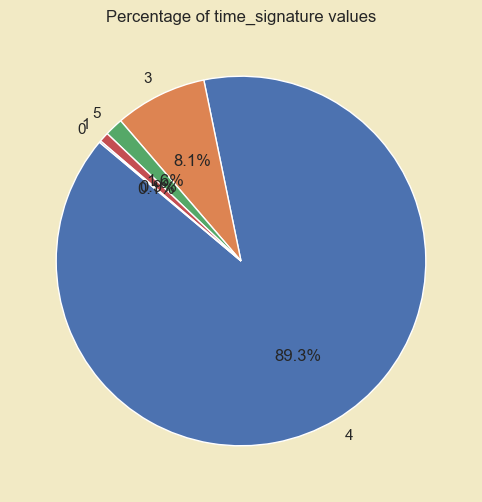

In [43]:
# create a pie chart of the time_signature column
plt.figure(figsize=(10, 6))
# Using time_signature.unique() and time_signature.value_counts() for the labels and values respectively
plt.pie(time_signature.value_counts(), labels=time_signature.value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of time_signature values')
plt.show()

- **Mode (🎛️):**
    - ⏱️ Count unique time signatures.
    - 🥧 Visualize the distribution of time signatures using a pie chart.


In [44]:
# Extract the 'mode' column from the 'spotify_data' DataFrame and store it in the 'mode' variable.
mode = spotify_data['mode']


In [63]:
# Display the first 5 rows of the 'mode' Series to preview the musical modes (major or minor) associated with the tracks.
mode.head(5)


0    0
1    1
2    1
3    1
4    1
Name: mode, dtype: object

In [46]:
# Count the unique records in the 'mode' Series and print the counts for each unique mode value.
# This will show the number of occurrences for each musical mode (e.g., major or minor) in the dataset.
print(f"The count of unique mode values in the dataset and their respective quantities are as follows:\n{mode.value_counts()}")


The count of unique mode values in the dataset and their respective quantities are as follows:
mode
1    72681
0    41319
Name: count, dtype: int64


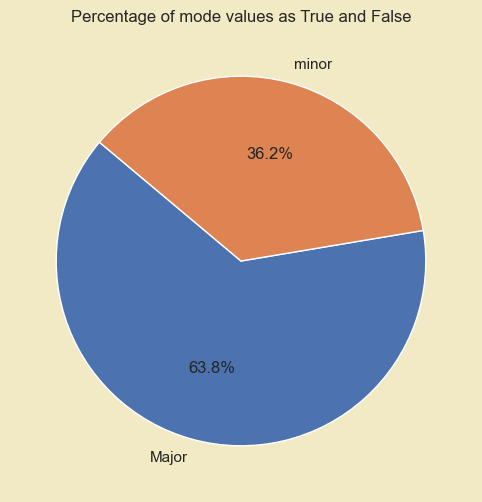

In [47]:
# Create a pie chart to visualize the distribution of musical modes (major and minor) in the 'mode' column.

# Set the figure size for the pie chart.
plt.figure(figsize=(10, 6))

# Replace 0 and 1 with 'minor' and 'Major' respectively for better readability in the pie chart labels.
labels = mode.value_counts().index.map({0: 'minor', 1: 'Major'})

# Create the pie chart using the counts of values in the 'mode' column.
# Use the modified labels and 'autopct' to display the percentage of each category.
# The 'startangle' parameter rotates the chart for better visual appeal.
plt.pie(mode.value_counts(), labels=labels, autopct='%1.1f%%', startangle=140)

# Set the title for the pie chart.
plt.title('Percentage of mode values as True and False')

# Display the pie chart.
plt.show()



- **Track Genre (🎧):**
    - 🎧 Count unique genres and their frequencies.
    - ⚖️ Check if all genres have equal representation.
    - 📊 Visualize the genre distribution using a bar chart.
    - 🔀 Analyze if each track_id has multiple genres.
    - 📈 Calculate the percentage of tracks with more than one genre and display the results.

In [48]:
# Extract the 'track_genre' column from the 'spotify_data' DataFrame and store it in the 'track_genre' variable.
track_genre = spotify_data['track_genre']


In [49]:
# Display the first 5 rows of the 'track_genre' Series to preview the genres associated with the tracks.
track_genre.head(5)


0    acoustic
1    acoustic
2    acoustic
3    acoustic
4    acoustic
Name: track_genre, dtype: object

In [64]:
# Count the unique records in the 'track_genre' Series and print the counts for each unique genre.
# This will show the number of occurrences for each genre in the dataset.
print(f"The count of unique track_genre values in the dataset and their respective quantities are as follows:\n{track_genre.value_counts()}")


The count of unique track_genre values in the dataset and their respective quantities are as follows:
track_genre
acoustic       1000
alternative    1000
black-metal    1000
alt-rock       1000
afrobeat       1000
               ... 
swedish        1000
tango          1000
trip-hop       1000
turkish        1000
world-music    1000
Name: count, Length: 114, dtype: int64


In [65]:
# Check if all genres in the 'track_genre' Series have the same number of occurrences.
genre_counts = track_genre.value_counts()  # Get the count of each genre.
all_equal = genre_counts.nunique() == 1  # Check if there is only one unique count value.

# Print the result indicating whether all categories have the same number of values.
print(f"Do all categories have the same number of values?: {all_equal}")


Do all categories have the same number of values?: True


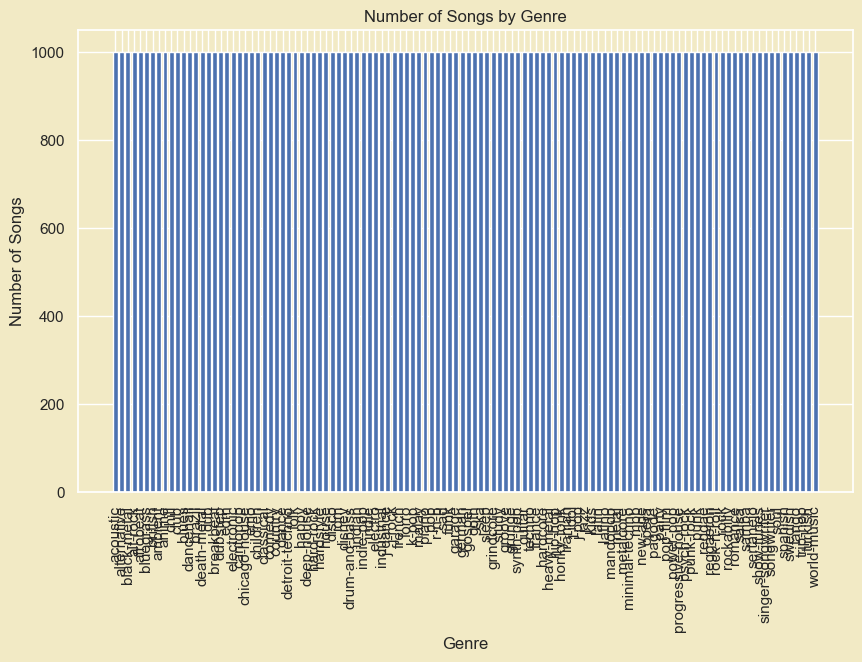

In [66]:
# Create a bar chart to visualize the number of songs for each genre in the 'track_genre' column.

# Set the figure size for the bar chart.
plt.figure(figsize=(10, 6))

# Create the bar chart using the index of genre_counts for the x-axis labels and genre_counts for the heights of the bars.
plt.bar(genre_counts.index, genre_counts)

# Set the title for the bar chart.
plt.title('Number of Songs by Genre')

# Label the x-axis as 'Genre'.
plt.xlabel('Genre')

# Label the y-axis as 'Number of Songs'.
plt.ylabel('Number of Songs')

# Rotate the x-axis labels for better visibility.
plt.xticks(rotation=90)

# Display the bar chart.
plt.show()


In [67]:
# Group the data by 'track_id' and count the number of unique genres associated with each track.
track_genre_groups = spotify_data.groupby('track_id')['track_genre'].nunique()

# Check if any 'track_id' has more than one unique genre.
have_different_genres = track_genre_groups.max() > 1

# Print the result indicating whether all 'track_id's have different genres.
print(f"Do all 'track_id's have different genres?: {have_different_genres}")


Do all 'track_id's have different genres?: True


In [54]:
# Count how many unique genres are associated with each 'track_id'.
track_genre_counts = spotify_data.groupby('track_id')['track_genre'].nunique()

# Filter to get only those 'track_id's that have more than one unique genre.
multiple_genres = track_genre_counts[track_genre_counts > 1]

# Count how many 'track_id's have different genres.
count_multiple_genres = multiple_genres.count()

# Calculate the total number of unique 'track_id's.
total_track_ids = track_genre_counts.count()

# Calculate the percentage of 'track_id's that have multiple genres.
percentage_multiple_genres = (count_multiple_genres / total_track_ids) * 100

# Print the results: the number of 'track_id's with multiple genres and their percentage.
print(f"Number of track_id's with multiple genres: {count_multiple_genres}")
print(f"Percentage of track_id's with multiple genres: {percentage_multiple_genres:.2f}%")


Number of track_id's with multiple genres: 16299
Percentage of track_id's with multiple genres: 18.16%


## DataFrame Column Explanations

1. Unnamed: 0 (🔢)
- Description: Column with auto-incremental and unique property.
- Data Type: Integer.
- Unique Values: True
- Analysis Notes: It was analyzed whether the column is a positive integer, auto-incremental, and unique, thus making it a candidate for the primary key of the table.

2. Track ID (🎫)
- Description: Column that serves as a unique identifier on Spotify.
- Data Type: String
- Unique Values: False
- Analysis Notes: This column was analyzed and found to have repeated information several times, with slight variations in musical genre.

3. Artists (🎤)
- Description: The names of the artists who performed the track.
- Data Type: String
- Unique Values: False
- Analysis Notes: There are 31,437 different artists, with the group The Beatles standing out with 279 appearances.

4. Album Name (💿)
- Description: The album name in which the track appears.
- Data Type: String
- Unique Values: False
- Analysis Notes: There are 46,589 different albums, with "Alternative Christmas 2022" highlighted with 195 appearances. Although the artist or album name may repeat, they are different due to having different track IDs and additional information.

5. Track Name (🎵)
- Description: Name of the track.
- Data Type: String
- Unique Values: False
- Analysis Notes: There are 73,608 different track names.

6. Explicit Column (🚫)
- Description: Indicates whether the track has explicit lyrics (true = yes; false = no or unknown).
- Data Type: Boolean
- Unique Values: False
- Analysis Notes: 91.4% of the songs are not explicit.

7. Key Column (🎹)
- Description: The key the track is in. Integers map to pitches using standard Pitch Class notation (e.g., 0 = C, 1 = C♯/D♭, 2 = D).
- Data Type: Integer - Categorical
- Unique Values: False
- Analysis Notes: Contains 12 unique values in a non-continuous range from 0 to 11, with the most frequent being 7, appearing 13,245 times. It should be noted that this is a categorical variable as it represents something rather than just a number.

8. Time Signature (⏱️)
- Description: An estimated time signature. The time signature (meter) specifies how many beats are in each bar (or measure). The time signature ranges from 0 to 4, indicating time signatures from 0/4 to 4/4.
- Data Type: Integer - Categorical
- Unique Values: False
- Analysis Notes: Contains 5 unique values, with the most frequent being 4/4, appearing in 101,843 songs. Like the key column, it is a non-continuous categorical variable since it signifies something.

9. Mode (🎛️)
- Description: Mode indicates the modality (Major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor by 0.
- Data Type: Boolean
- Unique Values: False
- Analysis Notes: Contains 2 unique values stored in the database as 1 and 0, which represent Major and Minor, respectively, with 63.8% of the songs being Major.

10. Track Genre (🎧)
- Description: The genre in which the track belongs.
- Data Type: String
- Unique Values: False
- Analysis Notes: Contains 114 unique values, with each containing 1,000 associated songs. As mentioned earlier, there are several records with the same track ID that have different genres.

11. Energy (🔋)
- Description: Energy is a measure from 0.0 to 1.0, representing a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
- Data Type: Float
- Unique Values: False
- Analysis Notes: Contains 2,080 values between 0.0 and 1.0, with an average energy of 0.64, indicating that most songs are at an intermediate level, leaning slightly towards loud, fast, and energetic music.

12. Danceability (💃)
- Description: Danceability describes how suitable a track is for dancing based on a combination of musical elements, including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- Data Type: Float
- Unique Values: False
- Analysis Notes: Contains 1,174 values, with an average around 0.58, suggesting that while the tracks can be danced to, they may not be as rhythmic and pleasant as others.

13. Duration_ms (⏲️)
- Description: The track length in milliseconds.
- Data Type: Integer
- Unique Values: False
- Analysis Notes: Contains 50,697 different durations, with an average of 212,906 ms or 3.54 minutes.

14. Popularity (🎯)
- Description: The popularity of a track ranges from 0 to 100 and is based on the total number of plays and their recency. Recently played songs have higher popularity. The popularity of artists and albums derives from the popularity of their tracks.
- Data Type: Integer
- Unique Values: False
- Analysis Notes: Contains 101 unique values, with an average of 35, indicating that the tracks are not very well known.

15. Loudness (🔊)
- Description: The overall loudness of a track in decibels (dB).
- Data Type: Float
- Unique Values: False
- Analysis Notes: Contains 19,480 different records, with an average decibel level around -7, indicating that they are quieter than the average songs.

16. Speechiness (🗣️)
- Description: Measures the presence of spoken words in a track: > 0.66: Mainly spoken words (e.g., audiobooks, poetry), 0.33 - 0.66: Combines music and speech (e.g., rap), < 0.33: Predominantly music without spoken content.
- Data Type: float64
- Unique Values: False
- Analysis Notes: Contains 1,489 unique records in a range from 0 to 0.96, with an average of 0.048, indicating that most songs are primarily instrumental or sung rather than spoken.

17. Acousticness (🌲)
- Description: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. A value of 1.0 represents high confidence that the track is acoustic.
- Data Type: float64
- Unique Values: False
- Analysis Notes: Contains 3,677 values in a range from 0 to 1, with an average of 0.16, indicating that it likely includes more electronic or synthesized sounds rather than pure acoustic instruments.

18. Instrumentalness (🎻)
- Description: Predicts whether a track has no vocals. Sounds like "ooh" and "aah" are considered instrumental. A value close to 1.0 indicates a higher probability that the track has no vocal content.
- Data Type: float64
- Unique Values: False
- Analysis Notes: Contains 3,655 unique values, with an average very close to zero, indicating that 99% of the songs have vocal content.

19. Liveness (🎤)
- Description: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live.
- Data Type: float64
- Unique Values: False
- Analysis Notes: Contains 1,722 unique records in a range from 0 to 1, with an average of 0.13, indicating that they contain at least some vocal content.

20. Valence (😊)
- Description: A measure from 0.0 to 1.0 describing the musical positivity conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, angry).
- Data Type: Float64
- Unique Values: False
- Analysis Notes: Contains 1,790 unique values in a range from 0 to 1, with an average of 0.46, indicating that the track mixes music and spoken words, as in rap or songs with spoken sections.

21. Tempo (🔄)
- Description: The tempo of a track in beats per minute (BPM).
- Data Type: Float
- Unique Values: False
- Analysis Notes: Contains 82,439 values, with an average of 122 BPM, indicating a slight preference for danceable songs.

##

## **Conclusions 📚**
### **Analysis: 📊**

- The dataset comprises 114,000 rows and 11 columns, providing a substantial volume of data for analysis. 📊
- Although the track_id values may repeat, it's important to note that track_id serves as a unique identifier. Upon analysis, it is observed that the only varying attribute is the track_genre, which reflects the classification algorithm utilized by Spotify. 🔍
- There are instances of albums with identical titles but different artists, indicating potential variations in the same-named works. 🎶
- The dataset may contain multiple versions of a song or album, which suggests a diverse representation of the same musical piece. 🎼
- The columns time_signature and key_column, although represented as numeric types, should be treated as categorical variables since they denote classifications rather than continuous measurements. In contrast, the mode column is correctly identified as a Boolean variable. 📊
- The column 'Unnamed: 0' meets all criteria to be considered a primary key, ensuring unique identification for each record. 🔑

## **Next Steps: 🚀**
- The presence of time_signature values represented as 0/4 is nonsensical and should be addressed in the data cleaning process. ❌
- It is essential to verify that the duration associated with time_signature has a value greater than zero, as the existence of songs with no duration contradicts the nature of musical recordings. ⏳
- The track_genre column should be eliminated, as it lacks a definitive method for attributing genres to specific songs. Furthermore, since all entries exhibit similar values, retaining this column does not add meaningful insight to the dataset. 📉
